<a href="https://colab.research.google.com/github/ass007-mouele/python/blob/master/AS_Pandas_Numpy_Linear_regressions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Execute the code below

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
link = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather2019.csv"
df_weather = pd.read_csv(link)
df_weather['DAY_OF_YEAR'] = df_weather.index+1


# Correlation Matrix
Find the most correlated column with MAX Temperature

 the most correlated column with MAX Temperature is 
 Index(['HEATINDEX_MAX_C'], dtype='object')


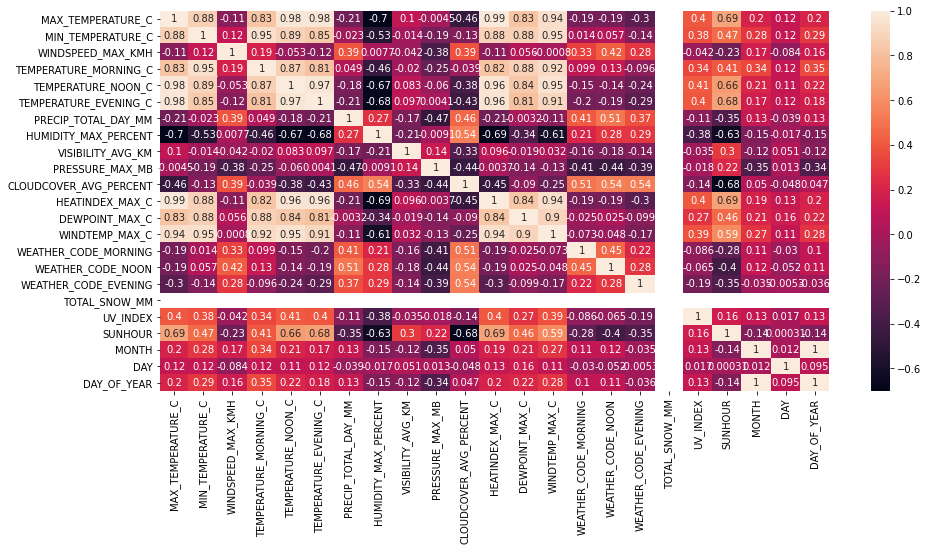

In [0]:
# Did you know that you can have a correlation heatmap with a simple line ?
df_weather.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

# Now, find the most correlated column with MAX Temperature
matrice_corr=df_weather.corr()
a=matrice_corr.loc[matrice_corr['MAX_TEMPERATURE_C']!=1 ,:] # On exclu d'abord la ligne 'MAX_TEMPERATURE_C' egal a 1
most_correlated=a.loc[a['MAX_TEMPERATURE_C']==max(a['MAX_TEMPERATURE_C'])] #on affiche la ligne dont la valeur est maxi dans la colone 'MAX_TEMPERATURE_C'
print(" the most correlated column with MAX Temperature is \n",most_correlated.index)

#on peut aussi afficher un heatmap
plt.figure(figsize=(15,7))
sns.heatmap(matrice_corr,annot=True)
plt.show()

# ScatterPlot
Draw a scatterplot with MAX Temperature on Y-axis, and the most correlated column on X-axis

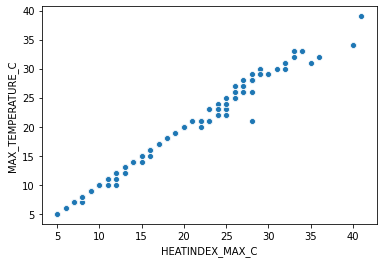

In [0]:
# Hop !

import seaborn as sns 
import matplotlib.pyplot as plt

sns.scatterplot(x=df_weather['HEATINDEX_MAX_C'],y=df_weather['MAX_TEMPERATURE_C'])

# Univariate linear regression with NumPy

## Find the equation

In [0]:
# NumPy can find the coefficients of the linear regression

# First of all, you have to define 2 series :
# X-axis : the most correlated column, that you found above
Xaxis = df_weather['HEATINDEX_MAX_C'] # Complete with your column

# Y-axis : the column to predict, so Max Temperature here
Yaxis = df_weather['MAX_TEMPERATURE_C']


In [0]:
# Then, NumPy calculate automatically coefficient. You just have to execute this code.

model = np.polyfit(x = Xaxis, y = Yaxis, deg = 1)


print("What's the type of this model ?, ", type(model))
print("What's inside ?, ", model)
print("\nHow can I read it ? \nDo you know linear function equation : f(x) = ax + b ? That's it !")
print(round(model[0],1) ," * x  +  ", round(model[1], 1) )

What's the type of this model ?,  <class 'numpy.ndarray'>
What's inside ?,  [0.93721643 0.74475835]

How can I read it ? 
Do you know linear function equation : f(x) = ax + b ? That's it !
0.9  * x  +   0.7


## Prediction

In [0]:
# You can "predict" the Max Temperature from your column and the equation
# For example, let's try if your column value is 21.

# Hand calculation :
print("By hand :", model[0] * 21 + model[1] )

# With a NumPy function :
print("NumPy :  ", np.poly1d(model)(21)   )

# And NumPy can calculate the prediction on multiple values, let's try with a list of values :
listtest = [12, 21, 30]
print("NumPy list of values :  ", np.poly1d(model)(listtest)   )


By hand : 20.426303380116146
NumPy :   20.426303380116146
NumPy list of values :   [11.99135551 20.42630338 28.86125125]


## Scatterplot and linear regression on the same chart

In [0]:
# You have to define your Min and Max value for the X-axis
Xmin = Xaxis.min()
Xmax = Xaxis.max()            # Complete this code

# We generate an array with a range of values between your min and max values
array = np.arange(Xmin, Xmax)
array

array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40])

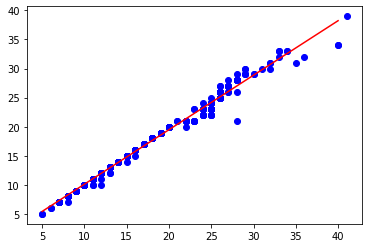

In [0]:
# On the same chart, draw : 
#         the same scatterplot than above, in blue
#         a red line plot with the array on X-axis and prediction based on the array-values on Y-axis

plt.scatter(x=Xaxis,y=Yaxis,c='b')
mod=np.polyfit(x=Xaxis,y=Yaxis,deg=1)
predic=np.poly1d(mod)(array)
plt.plot(array,predic,'r')
plt.show()

## Compare it with Seaborn
Draw a regplot with Seaborn, and compare your charts. It's simpler with Seaborn, but you can't access to the coeffeicient...

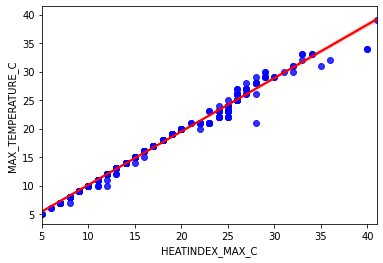

In [0]:
# Your code for the regplot with seaborn here :

sns.regplot(x=Xaxis,y=Yaxis,color='b',line_kws={"color":"r"})

# Polynomial regression

## Create a new model, similar to the previous model, but the X-axis has to be 'Day of the year' column. Y-axis is unchanged (Max Temperature).



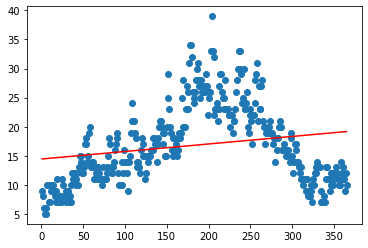

In [0]:
# Follow the same step as previously, to obtain a chart with :
#       blue scatterplot with real values
#       red lineplot with predicted values (linear regression)
#       'Day of the year' on X-axis
#       Max temperature on Y-axis

polymodel = np.polyfit(x=df_weather['DAY_OF_YEAR'], y=df_weather['MAX_TEMPERATURE_C'],deg=1 ) 
prediction=np.poly1d(polymodel)(df_weather['DAY_OF_YEAR'])
plt.scatter(x=df_weather['DAY_OF_YEAR'],y=df_weather['MAX_TEMPERATURE_C'])
plt.plot(df_weather['DAY_OF_YEAR'],prediction,'r')


## It's not good ? Let's try to change the degree (deg argument of the polyfit function)
[More information here](https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html)

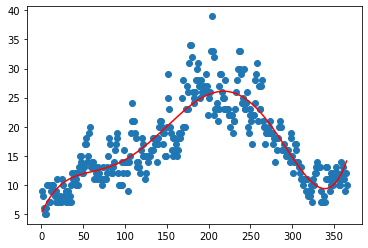

In [0]:
# Copy-paste your code, and just change the "deg" argument to find a better value

polymodel = np.polyfit(x=df_weather['DAY_OF_YEAR'], y=df_weather['MAX_TEMPERATURE_C'],deg=5 ) 
prediction=np.poly1d(polymodel)(df_weather['DAY_OF_YEAR'])

plt.scatter(x=df_weather['DAY_OF_YEAR'],y=df_weather['MAX_TEMPERATURE_C'])
plt.plot(df_weather['DAY_OF_YEAR'],prediction,'r')


## Calculate the predicted Max temperature for the day 171
You have to calculate twice :
- by hand
- with numpy function

In [0]:
# Your code here

Yaxis=df_weather['MAX_TEMPERATURE_C']
Xaxis=df_weather['HEATINDEX_MAX_C']

# la valeur de 'HEATINDEX_MAX_C' le day 171
HEATINDEX_DAY171=df_weather.loc[df_weather['DAY_OF_YEAR']==171,'HEATINDEX_MAX_C']

## by hand
mon_model=np.polyfit(x=Xaxis,y=Yaxis,deg=1)
print(' by hand\n',mon_model[0] * HEATINDEX_DAY171.values + mon_model[1] )

### with numpy function
ma_prediction=np.poly1d(mon_model)(HEATINDEX_DAY171.values)
print('with numpy function\n',ma_prediction)


 by hand
 [19.48908695]
with numpy function
 [19.48908695]


# Yes, you did it ! Now, let's save our work in the DataFrame

## Create a new column in the DataFrame, and find a way to write in this column the predicted values corresponding to the Day of the year column. This method could be usefull to fill missing values or outliers for example.


In [0]:
df_weather['MAX_TEMPERATURE_PREDICTED']=np.poly1d(mon_model)(df_weather['HEATINDEX_MAX_C'])
df_weather['MAX_TEMPERATURE_PREDICTED']=round(df_weather['MAX_TEMPERATURE_PREDICTED']) #On arrondi les predictions
df_weather['MAX_TEMPERATURE_PREDICTED']

0       9.0
1       8.0
2       6.0
3       5.0
4       6.0
       ... 
360    13.0
361    11.0
362     9.0
363    12.0
364    10.0
Name: MAX_TEMPERATURE_PREDICTED, Length: 365, dtype: float64